
# Assignment 3



### Create scatter plot of phi-vs-phi

              phi         psi
0     -149.312855  142.657714
1      -44.283210  136.002076
2     -119.972621 -168.705263
3     -135.317212  137.143523
4     -104.851467   95.928520
...           ...         ...
29364 -147.749557  155.223562
29365 -117.428541  133.019506
29366 -113.586448  112.091970
29367 -100.668779  -12.102821
29368 -169.951240   94.233680

[29369 rows x 2 columns]


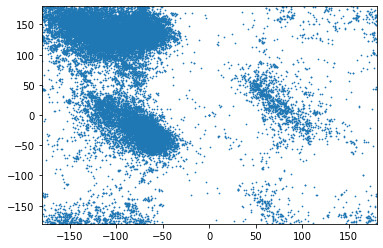

In [38]:
import pandas as pd
import numpy as np #load all libraries
import matplotlib.pyplot as plt
import seaborn


df = pd.read_csv('protein-angle-dataset.csv')

angles = df[['phi','psi']]

ax = plt.scatter(df.phi,df.psi, s=0.5)
plt.axis([-180, 180, -180, 180])
plt.show() #fix axes and stuff





### 2D histogram of distribution of angles

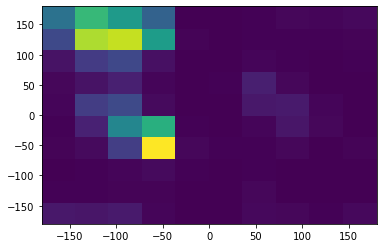

In [34]:
plt.hist2d(df.phi, df.psi)
plt.axis([-180, 180, -180, 180])
plt.show()

### K-means clustering

[[-105.18599695  134.60735892]
 [ -78.0817191   -36.92764453]
 [  87.55008471    8.80213455]]
74759867.63252649
[0 0 1 ... 0 1 0]


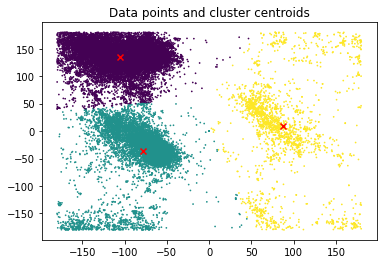

In [35]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3, random_state=1234).fit(angles) #k  = 3

print(kmean.cluster_centers_)
print(kmean.inertia_)

print(kmean.labels_)

plt.scatter(df.phi,df.psi, s=0.5, c=kmean.labels_.astype(float))

plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c='red', marker='x')

plt.title('Data points and cluster centroids')
plt.show()


#questions for lab: coloring of clusters?

### Elbow

[1. 2. 3. 4. 5. 6. 7. 8.]


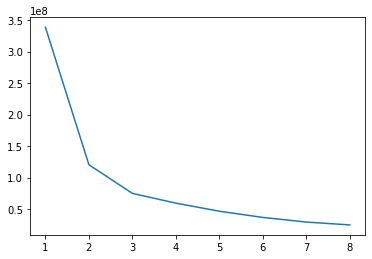

In [36]:

inertia = []

for k in range(1,9): #8 different clusters
  kmean = KMeans(n_clusters= k, random_state=1234).fit(angles)
  inertia.append(kmean.inertia_)

k=np.linspace(1,8,8)

print(k)

plt.plot(k,inertia)

### DBSCAN

1


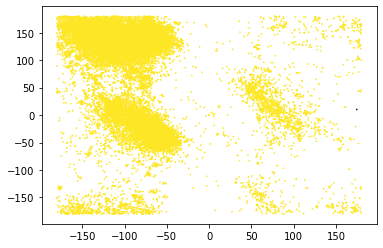

In [66]:
from sklearn.cluster import DBSCAN

X = np.array(angles)

clustering = DBSCAN(eps=30, min_samples=10).fit(X) #fråga om på labben, scaler?

labels = clustering.labels_

plt.scatter(df.phi,df.psi,s=0.5, c = clustering.labels_.astype(float) )

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print(n_clusters_)